<font color='purple'>

### Amate Shivdas Maruti

### classification data

### HR Analytics challenge data from Analytics Vidhya

Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

1)They first identify a set of employees based on recommendations/ past performance

2)Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical

3)At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion

For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
data=pd.read_csv('train_LZDllcl.csv')

In [118]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [120]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

We can see here there is only two variable have a missing value

In [121]:
data['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [122]:
data['education'].mode()

0    Bachelor's
dtype: object

In [123]:
data['education']=data['education'].fillna("Bachelor's")

In [124]:
data['previous_year_rating'].unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [125]:
data['previous_year_rating'].mode()

0    3.0
dtype: float64

In [126]:
data['previous_year_rating'] = data['previous_year_rating'].fillna(3)

In [127]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(data['gender'])
data['gender']=le.transform(data['gender'])

In [128]:
data=pd.get_dummies(data,columns=['department', 'education', 'recruitment_channel'])

In [129]:
data.head()

,employee_id,region,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,...,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,region_7,0,1,35,5.0,8,1,0,49,...,0,0,1,0,0,0,1,0,0,1
1,65141,region_22,1,1,30,5.0,4,0,0,60,...,0,0,0,0,1,0,0,1,0,0
2,7513,region_19,1,1,34,3.0,7,0,0,50,...,0,0,1,0,1,0,0,0,0,1
3,2542,region_23,1,2,39,1.0,10,0,0,50,...,0,0,1,0,1,0,0,1,0,0
4,48945,region_26,1,1,45,3.0,2,0,0,73,...,0,0,0,1,1,0,0,1,0,0


In [130]:
corr=data.corr()
corr

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
employee_id,1.000000,-0.001542,-0.005121,0.000437,0.004209,0.001274,-0.002501,0.008420,-0.000586,0.001206,...,0.005393,-0.005754,-0.002645,-0.003148,-0.001599,-0.003680,0.002619,-0.005920,0.000269,0.005875
gender,-0.001542,1.000000,0.084501,-0.016293,-0.024024,-0.019675,-0.037400,0.002381,-0.024494,-0.011109,...,-0.137846,0.071692,0.160706,-0.078680,0.034001,-0.016392,-0.030122,-0.007520,0.007231,0.005472
no_of_trainings,-0.005121,0.084501,1.000000,-0.081278,-0.061564,-0.057275,-0.045576,-0.007628,0.042517,-0.024896,...,0.044313,0.033410,0.026698,0.004984,0.032297,0.004562,-0.034053,0.012225,-0.013615,-0.008358
age,0.000437,-0.016293,-0.081278,1.000000,0.026810,0.657111,-0.025592,-0.008169,-0.048380,-0.017166,...,0.055369,-0.034883,0.004931,0.003196,-0.310979,-0.174815,0.363260,0.017304,-0.042124,-0.005225
previous_year_rating,0.004209,-0.024024,-0.061564,0.026810,1.000000,0.023504,0.337367,0.026587,0.071926,0.153230,...,-0.007515,0.023559,-0.132583,-0.050312,-0.026613,-0.002386,0.027689,-0.015120,0.065856,-0.003831
length_of_service,0.001274,-0.019675,-0.057275,0.657111,0.023504,1.000000,-0.077693,-0.039927,-0.038122,-0.010670,...,0.042237,-0.041881,0.007305,0.004474,-0.213880,-0.119119,0.249536,0.007202,-0.030292,0.001513
KPIs_met >80%,-0.002501,-0.037400,-0.045576,-0.025592,0.337367,-0.077693,1.000000,0.097000,0.078391,0.221582,...,0.020728,0.018385,-0.121167,-0.006174,-0.013550,0.012278,0.010452,-0.006551,0.047621,-0.007178
awards_won?,0.008420,0.002381,-0.007628,-0.008169,0.026587,-0.039927,0.097000,1.000000,0.072138,0.195871,...,0.002018,-0.001948,-0.007679,0.007062,0.002009,-0.004691,-0.000773,0.005006,0.003004,-0.005902
avg_training_score,-0.000586,-0.024494,0.042517,-0.048380,0.071926,-0.038122,0.078391,0.072138,1.000000,0.181147,...,0.194926,0.216130,-0.653710,0.478712,-0.034102,0.014050,0.030857,-0.001999,0.030496,-0.006805
is_promoted,0.001206,-0.011109,-0.024896,-0.017166,0.153230,-0.010670,0.221582,0.195871,0.181147,1.000000,...,0.015548,-0.007859,-0.031348,0.031085,-0.028650,-0.000849,0.029343,-0.004879,0.018641,-0.000483


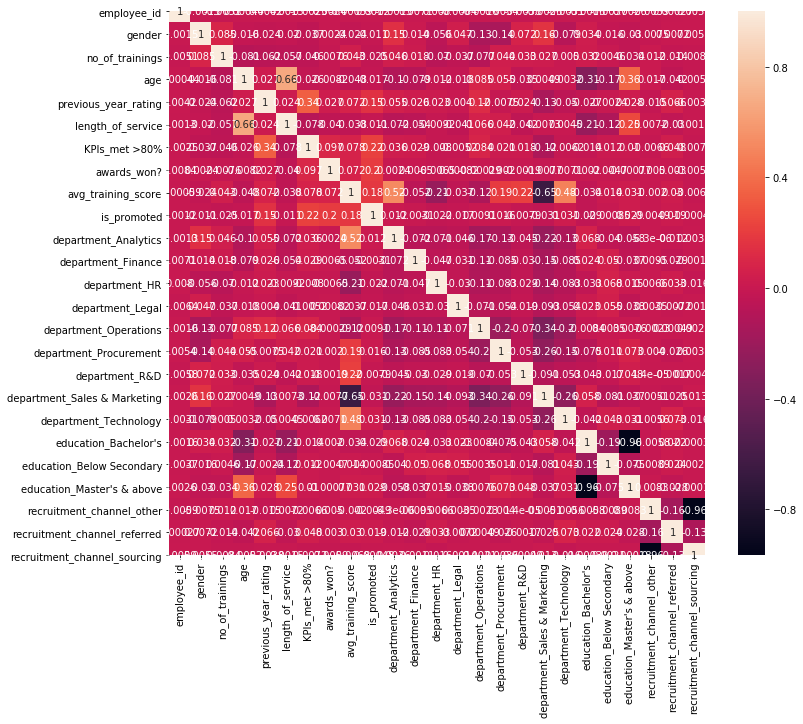

In [131]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True)
plt.show()

### split data into independent and dependent variable

In [132]:
x=data.drop(['employee_id', 'region', 'is_promoted'], axis=1)
y=data['is_promoted']
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 23 columns):
gender                          54808 non-null int32
no_of_trainings                 54808 non-null int64
age                             54808 non-null int64
previous_year_rating            54808 non-null float64
length_of_service               54808 non-null int64
KPIs_met >80%                   54808 non-null int64
awards_won?                     54808 non-null int64
avg_training_score              54808 non-null int64
department_Analytics            54808 non-null uint8
department_Finance              54808 non-null uint8
department_HR                   54808 non-null uint8
department_Legal                54808 non-null uint8
department_Operations           54808 non-null uint8
department_Procurement          54808 non-null uint8
department_R&D                  54808 non-null uint8
department_Sales & Marketing    54808 non-null uint8
department_Technology           54808 non

In [133]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.70, random_state=110)

In [134]:
print("after Oversampling count label 1 : {}".format(sum(y_train == 1)))
print("after Oversampling count label 0 : {}".format(sum(y_train == 0)))


after Oversampling count label 1 : 1438
after Oversampling count label 0 : 15004


### Model building`

In [135]:
# knn
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=100)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='uniform')

In [136]:
y_pred=knn.predict(x_test)
from sklearn.metrics import confusion_matrix
print('confusion matrix :\n', confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score
print('accuaracy_score:',accuracy_score(y_test, y_pred))

confusion matrix :
 [[35120    16]
 [ 3000   230]]
accuaracy_score: 0.9213887296043372


In [137]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     35136
           1       0.93      0.07      0.13      3230

    accuracy                           0.92     38366
   macro avg       0.93      0.54      0.55     38366
weighted avg       0.92      0.92      0.89     38366



## Decision Tree

In [138]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf=clf.fit(x_train, y_train)

In [139]:
y_pred1=clf.predict(x_test)

In [140]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred1))

0.8936819058541416


In [141]:
from sklearn.metrics import confusion_matrix
print('confusion_matrix:\n',confusion_matrix(y_test, y_pred1))

confusion_matrix:
 [[32863  2273]
 [ 1806  1424]]


In [142]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     35136
           1       0.39      0.44      0.41      3230

    accuracy                           0.89     38366
   macro avg       0.67      0.69      0.68     38366
weighted avg       0.90      0.89      0.90     38366



## Random forest

In [143]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200, random_state=100)
rf.fit(x_train,y_train)
y_pred2=rf.predict(x_test)

In [144]:
from sklearn.metrics import confusion_matrix
print('confusion matrix:\n', confusion_matrix(y_test, y_pred2))

confusion matrix:
 [[34806   330]
 [ 2243   987]]


In [145]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred2))

0.9329354115623208


In [146]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     35136
           1       0.75      0.31      0.43      3230

    accuracy                           0.93     38366
   macro avg       0.84      0.65      0.70     38366
weighted avg       0.92      0.93      0.92     38366



### Naive Bayes

In [147]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(x_train, y_train)
y_pred3=gnb.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score
print("confusion matrix : \n",confusion_matrix(y_test, y_pred3))
print(accuracy_score(y_test, y_pred3))

confusion matrix : 
 [[33690  1446]
 [ 2678   552]]
0.892508992336965


In [148]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     35136
           1       0.28      0.17      0.21      3230

    accuracy                           0.89     38366
   macro avg       0.60      0.56      0.58     38366
weighted avg       0.87      0.89      0.88     38366



In [149]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_train, y_train)
y_pred4=bnb.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
print("confusion matrix : \n",confusion_matrix(y_test, y_pred4))
print("Accuracy: \n",accuracy_score(y_test, y_pred4))

confusion matrix : 
 [[34785   351]
 [ 3018   212]]
Accuracy: 
 0.9121878746807068


In [150]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     35136
           1       0.38      0.07      0.11      3230

    accuracy                           0.91     38366
   macro avg       0.65      0.53      0.53     38366
weighted avg       0.87      0.91      0.88     38366



In [151]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
y_pred5=mnb.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
print("confusion matrix : \n",confusion_matrix(y_test, y_pred5))
print("Accuracy: \n",accuracy_score(y_test, y_pred5))

confusion matrix : 
 [[34820   316]
 [ 2915   315]]
Accuracy: 
 0.9157848094667154


In [152]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     35136
           1       0.50      0.10      0.16      3230

    accuracy                           0.92     38366
   macro avg       0.71      0.54      0.56     38366
weighted avg       0.89      0.92      0.89     38366



## Voting Classifier

In [153]:
from sklearn.ensemble import VotingClassifier
voting_clf_H = VotingClassifier(estimators=[('MNB', mnb), ('RF', rf), ('DT', clf), ('KNN', knn)], voting='hard')
voting_clf_H.fit(x_train, y_train)
y_pred6 =voting_clf_H.predict(x_test) 
from sklearn.metrics import confusion_matrix, accuracy_score
print("confusion matrix : \n",confusion_matrix(y_test, y_pred6))
print("Accuracy: \n",accuracy_score(y_test, y_pred6))

confusion matrix : 
 [[35105    31]
 [ 2904   326]]
Accuracy: 
 0.9234999739352552


In [154]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x_train_s, y_train_s=smt.fit_sample(x_train, y_train)

ModuleNotFoundError: No module named 'imblearn'

### Test data

In [155]:
data_test=pd.read_csv('test_2umaH9m.csv')

In [156]:
data_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [157]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
employee_id             23490 non-null int64
department              23490 non-null object
region                  23490 non-null object
education               22456 non-null object
gender                  23490 non-null object
recruitment_channel     23490 non-null object
no_of_trainings         23490 non-null int64
age                     23490 non-null int64
previous_year_rating    21678 non-null float64
length_of_service       23490 non-null int64
KPIs_met >80%           23490 non-null int64
awards_won?             23490 non-null int64
avg_training_score      23490 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [158]:
data_test['education'].mode()

0    Bachelor's
dtype: object

In [159]:
data_test['education']=data_test['education'].fillna("Bachelor's")

In [160]:
data_test['previous_year_rating'].mode()

0    3.0
dtype: float64

In [161]:
data_test['previous_year_rating']=data_test['previous_year_rating'].fillna(3)

In [162]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(data_test['gender'])
data_test['gender']=le.transform(data_test['gender'])

In [163]:
data_test=pd.get_dummies(data_test, columns=['department', 'education', 'recruitment_channel'])

In [164]:
x1=data_test.drop(['employee_id', 'region'], axis=1)
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 23 columns):
gender                          23490 non-null int32
no_of_trainings                 23490 non-null int64
age                             23490 non-null int64
previous_year_rating            23490 non-null float64
length_of_service               23490 non-null int64
KPIs_met >80%                   23490 non-null int64
awards_won?                     23490 non-null int64
avg_training_score              23490 non-null int64
department_Analytics            23490 non-null uint8
department_Finance              23490 non-null uint8
department_HR                   23490 non-null uint8
department_Legal                23490 non-null uint8
department_Operations           23490 non-null uint8
department_Procurement          23490 non-null uint8
department_R&D                  23490 non-null uint8
department_Sales & Marketing    23490 non-null uint8
department_Technology           23490 non

In [165]:
y_pred_test=rf.predict(x1)

In [166]:
HR_prediction = pd.read_csv('test_2umaH9m.csv')

HR_ID = HR_prediction['employee_id']

In [167]:
submission=pd.DataFrame({'employee_id':HR_ID, 'is_promoted':y_pred_test})
submission.to_csv("HR Analytics Prediction.csv",index=False)